# Segmentación Simple por Color

###La Segementacion consiste en dividir una imagen digital en varias regiones denominadas segmentos. El objetivo de la segmentación es localizar regiones con significado. La segmentación se usa tanto para localizar objetos como para encontrar sus bordes dentro de una imagen.

Importamos las librerias necesarias para el Laboratorio:

* NumPy para trabajar con matrices
* OpenCV (cv2) para procesar las imágenes
* Matplotlib para poder visualizar las imágenes

In [ ]:
# Importamos las librerias necesarias
import numpy as np
from cv2 import imread
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
#Se define función para obenter información de la imagen
def info_img(img):
    print('tamaño =', img.shape)
    print('máximo =', np.max(img))
    print('mínimo =', np.min(img))

In [ ]:
#Elegimos una imagen y la cargamos para trabajar con la misma
!wget https://img.freepik.com/fotos-premium/gran-grupo-frutas-verduras-frescas_135427-2732.jpg

--2025-04-16 00:26:06--  https://img.freepik.com/fotos-premium/gran-grupo-frutas-verduras-frescas_135427-2732.jpg
Resolving img.freepik.com (img.freepik.com)... 23.219.78.71, 23.219.78.79, 2600:1409:3c00:9::172c:af49, ...
Connecting to img.freepik.com (img.freepik.com)|23.219.78.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67688 (66K) [image/jpeg]
Saving to: ‘gran-grupo-frutas-verduras-frescas_135427-2732.jpg’

gran-grupo-frutas-v 100%[===================>]  66.10K   174KB/s    in 0.4s    

2025-04-16 00:26:07 (174 KB/s) - ‘gran-grupo-frutas-verduras-frescas_135427-2732.jpg’ saved [67688/67688]



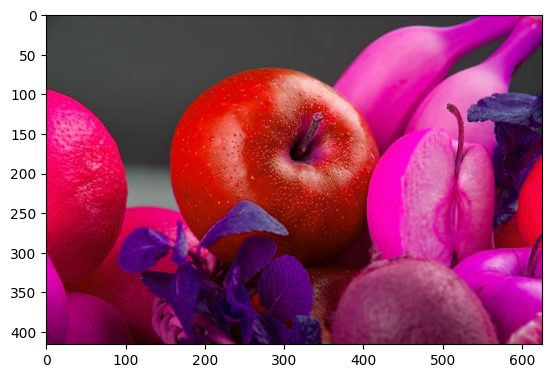

In [ ]:
#Leemos la imagen seleccionada utilizando metodo imread de libreria cv2 y la asignamos a variable "img"
img_cv = imread('gran-grupo-frutas-verduras-frescas_135427-2732.jpg')      # formato opencv (BGR)
img = img_cv[:,:,[2,0,1]] # Cambio orden de canales para jugar un poco
plt.imshow(img)
plt.show()

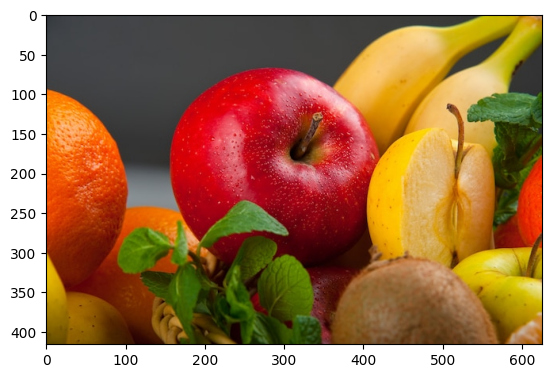

In [ ]:
#Llevamos a cabo la Conversión BGR a RGB
img = img_cv[:,:,[2,1,0]]          # BGR a RGB
plt.imshow(img)
plt.show()

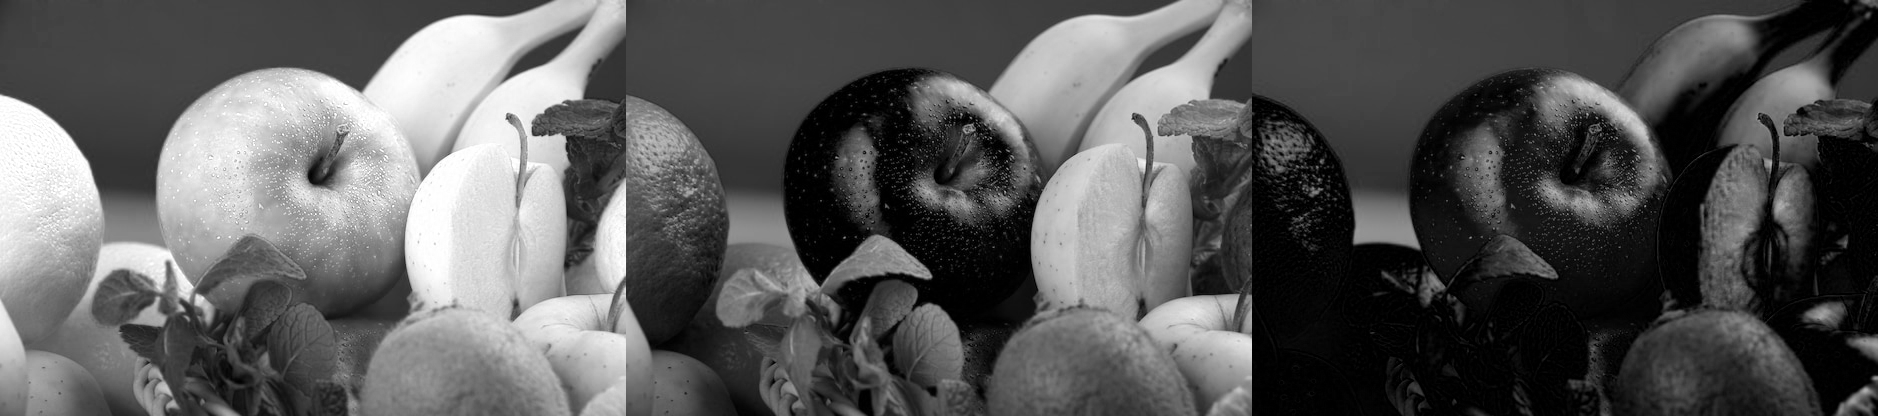

In [ ]:
#Llevamos a cabo la separación de canales de color
rojo = img[:,:,0]
verde = img[:,:,1]
azul = img[:,:,2]
#Concatenamos los canales para mostrarlos luego uno al lado del otro
canales = np.concatenate((rojo,verde,azul),axis=1)
cv2_imshow(canales)

tamaño = (416, 626)
máximo = 228
mínimo = 1


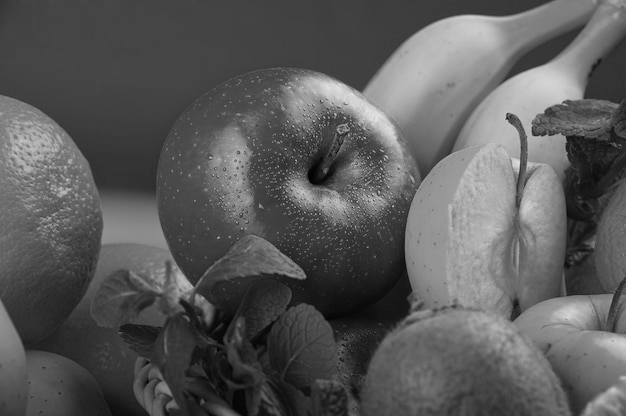

In [ ]:
#Procedemos a la conversión a escala de grises
rojo_f = rojo.astype(float)
verde_f = verde.astype(float)
azul_f = azul.astype(float)
#Aplicaremos un promedio ponderado
peso = (1/3,1/3,1/3)
gris_f = peso[0]*rojo_f + peso[1]*verde_f + peso[2]*azul_f
gris = gris_f.astype(int)
info_img(gris)
cv2_imshow(gris)

In [ ]:
#Se define una función para mostrar histograma
def histograma(X):
    (N,M) = X.shape
    n = 256
    h = np.zeros((256,))
    for i in range(N):
        for j in range(M):
            x = X[i,j]
            h[x] = h[x]+1
    plt.plot(range(n),h[0:n])
    plt.title('Histograma')
    plt.xlabel('Valor de pixel')
    plt.ylabel('Frecuencia')
    plt.show()

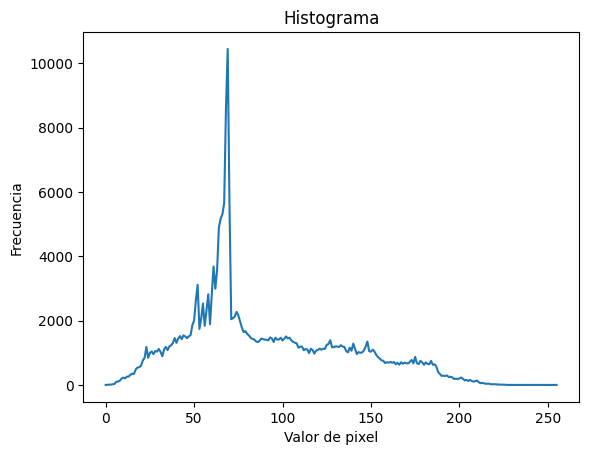

In [ ]:
histograma(gris)

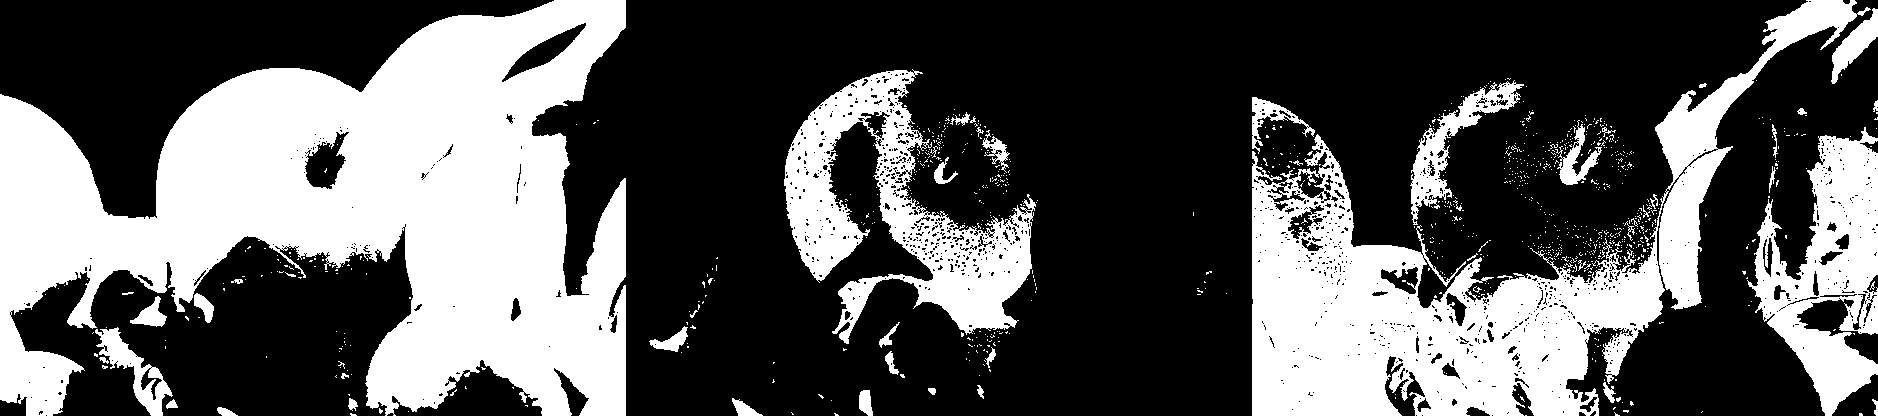

In [ ]:
# Segmentación de la manzana roja
seg_r = rojo>120
seg_v = verde<12
seg_a = azul<12
seg_rgb = np.concatenate((seg_r,seg_v,seg_a),axis=1)
cv2_imshow(seg_rgb*255)

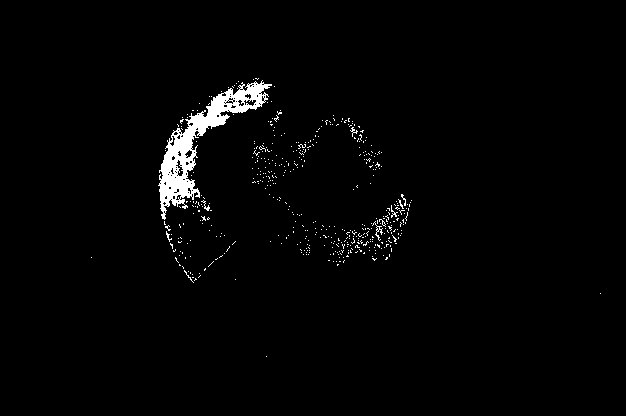

In [ ]:
#Llevamos a cabo la union logica de los canales rojo y verde
seg_rv = np.logical_and(seg_r,seg_v)
#Hacemos lo mismo entre la union logica generada en el paso anterior con el canal restante
seg = np.logical_and(seg_rv,seg_a)
cv2_imshow(seg*255)

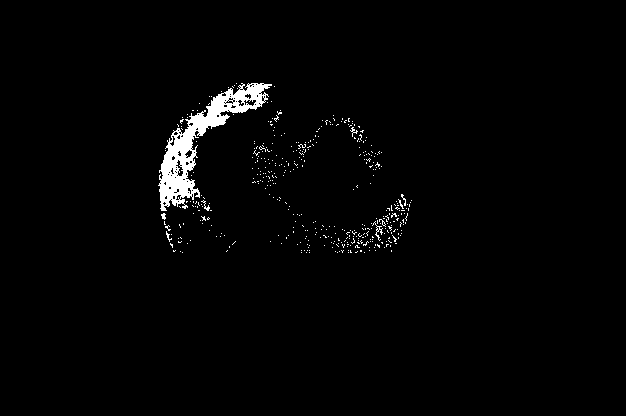

In [ ]:
# Eliminación de píxeles aislados
(N,M) = seg.shape
limpia = seg.copy()
for i in range(N):
    s = np.sum(seg[i,:])
    if s<10:
        limpia[i,:] = 0
cv2_imshow(limpia*255)

In [ ]:
#Buscamos las coordenadas del rectángulo
i_min = 1000
i_max = 0
j_min = 1000
j_max = 0
for i in range(N):
    for j in range(M):
        if limpia[i,j]>0:
            if i<i_min: i_min = i
            if i>i_max: i_max = i
            if j<j_min: j_min = j
            if j>j_max: j_max = j

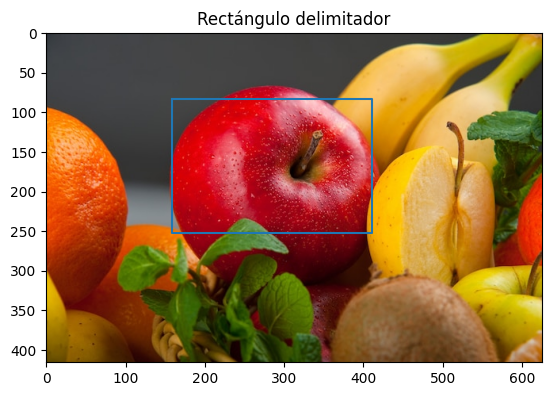

In [ ]:
# A partir de las coordenadas obtenida, dibujamos el rectángulo
y = [i_min,i_min,i_max,i_max,i_min]
x = [j_min,j_max,j_max,j_min,j_min]
plt.imshow(img)
plt.plot(x,y)
plt.title('Rectángulo delimitador')
plt.show()